# Análisis Exploratorio de Datos Pokemon Stats y Tipos

### Importar librerías 

In [430]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Establecer una apariencia general para todos los gráficos

In [431]:
plt.style.use("seaborn-v0_8-darkgrid")

### Conociendo nuestros datos de Pokemon. 

El conjunto de datos es acerca de pokemon y viene de dataset de [Pokemon Stats](https://www.kaggle.com/datasets/ulrikthygepedersen/pokemon-stats) de kaggle.

En el Dataset se encuentran generación, stats, tipos y si es legendario de todos los pokemon hasta los dlcs hasta los DLC de Pokémon Sword and Shield.

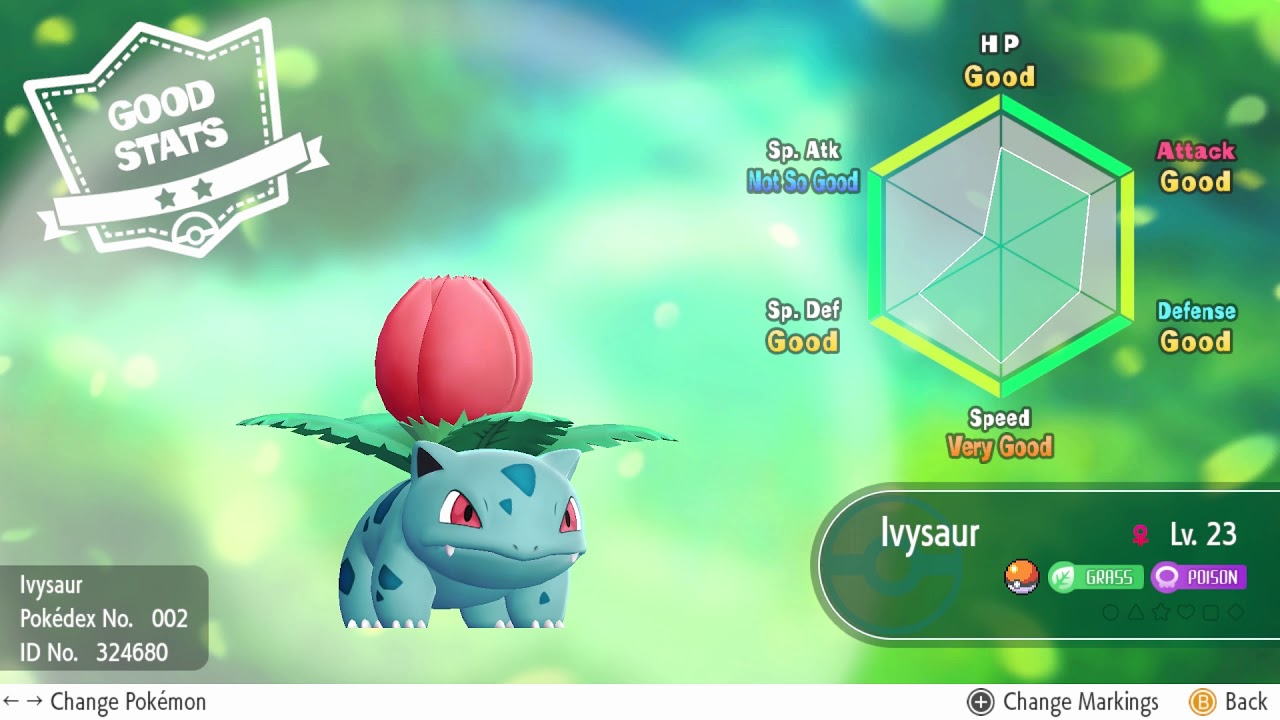

### Cargar los datos


##### Datos crudos


In [432]:
raw_pokemon = pd.read_csv('data/raw/pokemon.csv')

### Algunas preguntas para analizar el dataset

- ¿Qué generación tiene más pokemon?
- ¿Qué generación tiene más legendarios?
- ¿Cuál es el tipo más común entre los pokemon pseudolegendarios?
- ¿Cuál es el tipo más común entre los pokemon legendarios?
- ¿Qué tan común son los legendarios?
- ¿Qué tan poderosos son los legendarios a comparación de los otros pokemon?
- ¿Qué tipo es mejor en cada estadistica?

### Filtrado inicial

In [433]:
df_pokemon = raw_pokemon.copy(deep=True)

##### Filtro de las formas pokemon


In [434]:
sin_gigantamax = df_pokemon[~ (df_pokemon['name'].str[:len('Gigantamax')].str.contains('Gigantamax'))]

In [435]:
sin_megaevo = sin_gigantamax[~ (sin_gigantamax['name'].str[:len('Mega ')].str.contains('Mega '))]

In [436]:
sin_primal = sin_megaevo[~ (sin_megaevo['name'].str[:len('Primal ')].str.contains('Primal '))]

In [437]:
sin_eternamax_eternatus = sin_primal[sin_primal['name'] != 'Eternamax Eternatus']

In [438]:
sin_dada_zarude = sin_eternamax_eternatus[sin_eternamax_eternatus['name'] != 'Dada Zarude']

In [439]:
sin_keldeo_resolute_form = sin_dada_zarude[sin_dada_zarude['name'] != 'Keldeo Resolute Forme']

In [440]:
df_filtrado = sin_keldeo_resolute_form.copy(deep=True)

### Análisis


##### Análisis generacional

In [441]:
generation = (df_filtrado.groupby('generation').size())[1:]

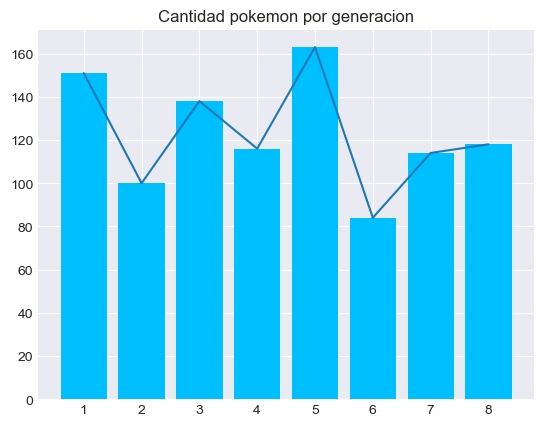

In [442]:
plt.bar([str(i) for i in generation.index],generation,color='deepskyblue')
plt.plot([str(i) for i in generation.index],generation)
plt.title('Cantidad pokemon por generacion')
plt.show()

En esta grafica se puede visualizar la cantidad de pokemon por generacion y el cambio en el transcurir de estas. Siendo la que tiene menos pokemon la sexta generacion y la que más tiene la quinta generacion.

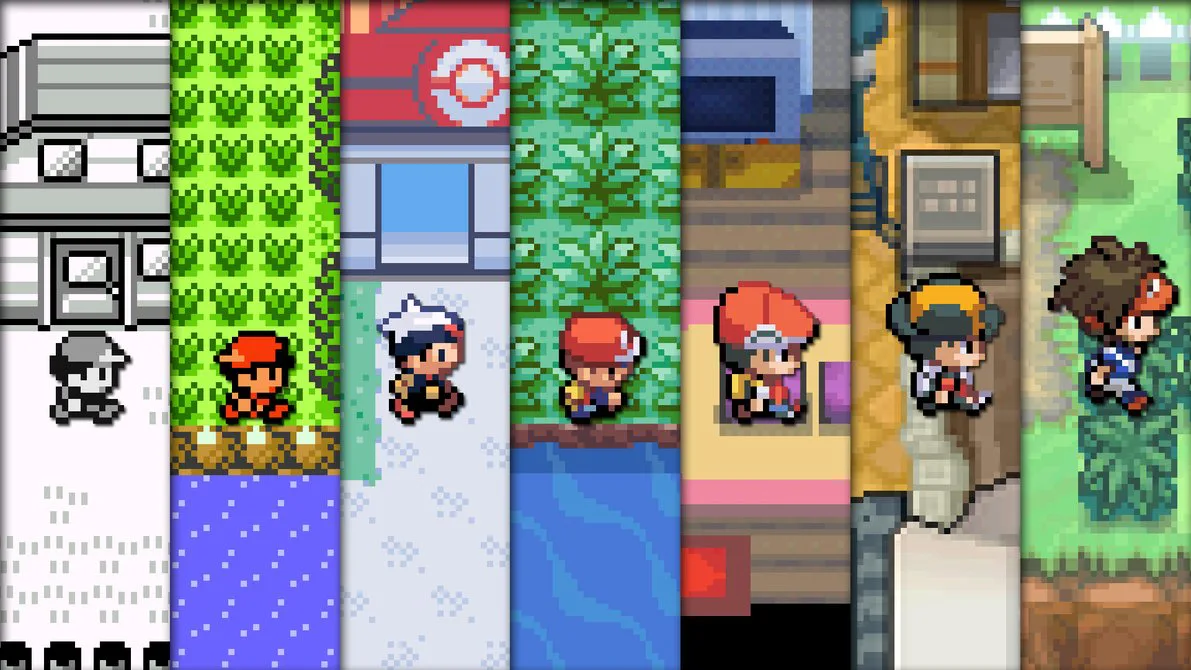

##### Análisis legendarios

Los pokemon legendarios son extremadamente raros y normalmente poderosos los cuales normalmente vienen de la mitologia o leyendas del mundo pokemon siendo creadores, heroes o maldiciones del mundo pokemon.

![Legendarios](https://www.latercera.com/resizer/URfpTuSO3QnZFnrx5TdHT4nCBA4=/900x600/smart/arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/JZYFMMWOUBG7FO2SXILEI25MTM.png)

In [443]:
generation_legendary= df_filtrado[df_filtrado['legendary'] == True].groupby('generation').size()[1:]

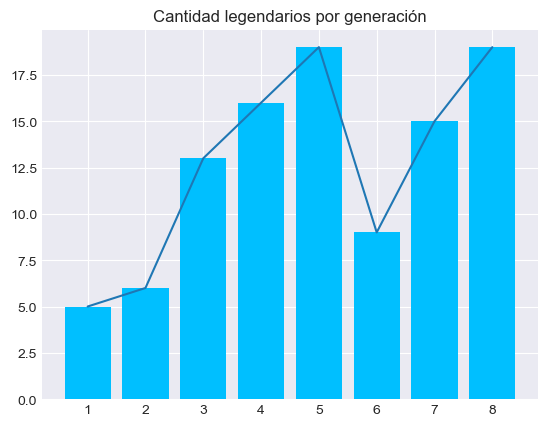

In [444]:
plt.bar([str(i) for i in generation_legendary.index],generation_legendary,color='deepskyblue')
plt.plot([str(i) for i in generation_legendary.index],generation_legendary)
plt.title('Cantidad legendarios por generación')
plt.show()

Las generaciones con más legendarios son la 5 y 8, la quinta porque tiene más pokemon y la octavada debido a que cada DLC traía legendarios.

In [445]:
comparación_cantidad = df_filtrado.groupby('legendary').size()

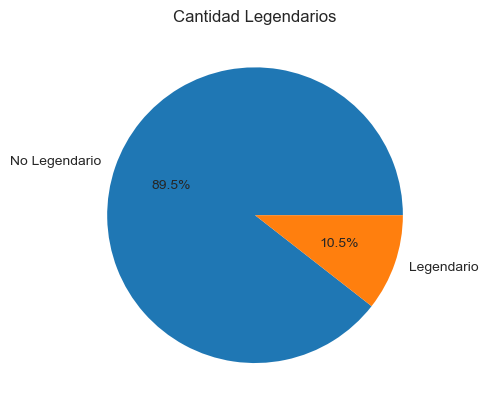

In [446]:
plt.pie(comparación_cantidad,labels=["No Legendario","Legendario"],autopct='%1.1f%%')
plt.title('Cantidad Legendarios')
plt.show()

Solo un 10% de los pokemon son legendarios, debido a qué son místicos y poco comunes

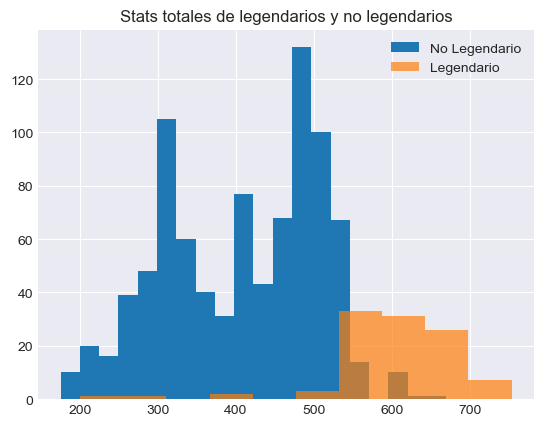

In [447]:
plt.hist(df_filtrado[df_filtrado['legendary'] == False]["total"], bins= 20,label = "No Legendario")
plt.hist(df_filtrado[df_filtrado['legendary'] == True]["total"],alpha=0.7,label="Legendario")
plt.title('Stats totales de legendarios y no legendarios')
plt.legend()
plt.show()

Los pokemons con más stats en total son los legendarios, debido a que estos míticos pokemon poseen un gran poder

##### Filtrado por tipos

In [448]:
first_type = df_filtrado.drop('type2',axis=1).rename(columns={'type1':'type'})

In [449]:
second_type = df_filtrado[pd.isnull(df_filtrado['type2'])==False].drop('type1',axis=1).rename(columns={'type2':'type'})

In [450]:
one_type_table = pd.concat([first_type,second_type],ignore_index=True).sort_values(by=['number'],ignore_index=True)

In [451]:
one_type_table.loc[one_type_table['type'] == 'Graass', 'type'] = 'Grass'

Habia un error en el nombre del tipo de un pokemon y se corrigió

##### Funcion para darles colores definidos a cada tipo a todas las graficas

In [452]:
colores_por_tipo = {
    'Bug': 'green',
    'Dark': 'black',
    'Dragon': 'blue',
    'Electric': 'yellow',
    'Fairy': 'pink',
    'Fighting': 'brown',
    'Fire': 'red',
    'Flying': 'cyan',
    'Ghost': 'purple',
    'Grass': 'lime',
    'Ground': 'orange',
    'Ice': 'lightblue',
    'Normal': 'gray',
    'Poison': 'darkviolet',
    'Psychic': 'magenta',
    'Rock': 'saddlebrown',
    'Steel': 'darkgray',
    'Water': 'deepskyblue'
}

In [453]:
colores = lambda lista : [colores_por_tipo[i] for i in lista]

##### Cantidad pokemon por tipo

In [454]:
types = one_type_table.groupby('type').size().sort_values(ascending=False)

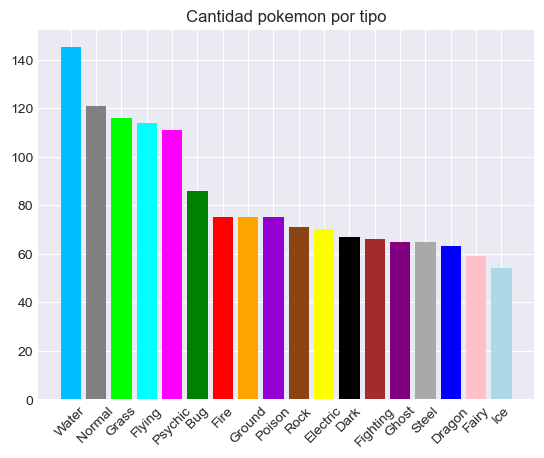

In [455]:
plt.bar(types.index,types,color=colores(types.index))
plt.title('Cantidad pokemon por tipo')
plt.xticks(rotation=45) 
plt.show()

El tipo mas comun de pokemon son los agua debido a la inmensidad de los mares.

![agua](https://pm1.aminoapps.com/6114/aa4650604058c797084881ed3b8cf6f0b6702a8b_00.jpg)

##### Pseudo legendary por tipo

Los pseudo legendary son aquellos pokemon no legendarios que la suma de sus estadisticas son exactamente 600, teniendo siempre 3 etapas evolutivas y una recoleccion de experiencia lenta. Estos pokemon son normalmente los mas fuertes no legendarios de cada region, normalmente no viene mas de 2 por generación.

![Legendarios](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2019/07/pseudo-legendary-feature.jpg)

In [456]:
pseudo_legendary = one_type_table[(one_type_table['total'] == 600) & (one_type_table['legendary'] == False)].groupby('type').size()


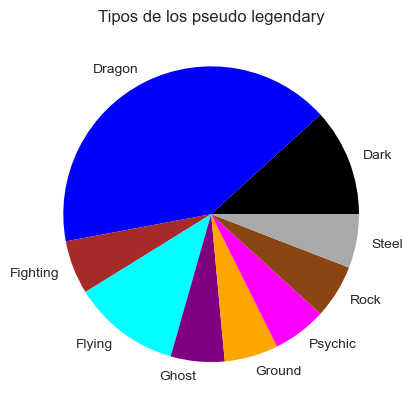

In [457]:
plt.pie(pseudo_legendary,labels=pseudo_legendary.index,colors=colores(pseudo_legendary.index))
plt.title('Tipos de los pseudo legendary')
plt.show()

En esta grafica se evidencia que la mayoria de pseudo legendary son tipo dragon, posiblemente al mistisismo que enrolla al tipo dragon como raros y poderosos.

##### Legendary por tipo

In [458]:
legendarys = one_type_table[one_type_table['legendary'] == True].groupby('type').size().sort_values(ascending=True)

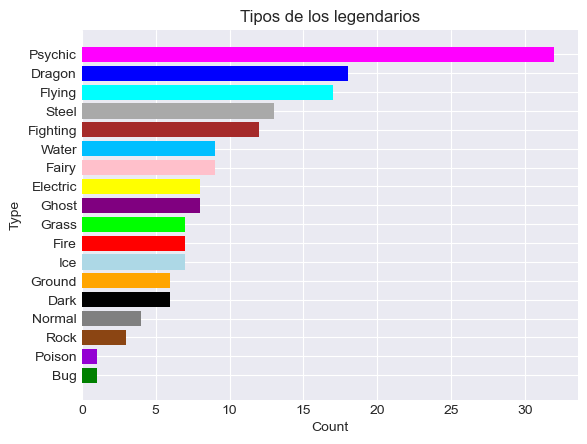

In [459]:
plt.barh(legendarys.index, legendarys, color=colores(legendarys.index))
plt.title('Tipos de los legendarios')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

La mayoria de los pokemon legendarios son tipo psychic debido que es un tipo relacionado a los mitico y lo que no es de este mundo y a que en la primera generacion este tipo fue creador para ser el mas fuerte de todos asi que por motivos de diseno hicieron a muchos de los legendarios sean de este tipo

![mewtwo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIdLthn8T72mkehN7Oa9f0CgBP6XzFER1Q5Z5ahT8U7g&s)

Mewtwo, el primer legendario tipo pyshic y el mas poderoso de su generacion 


##### Comparación tipos por cada estadistica 

In [460]:
hp_bytype = one_type_table.groupby('type')['hp'].median().sort_values(ascending=False)

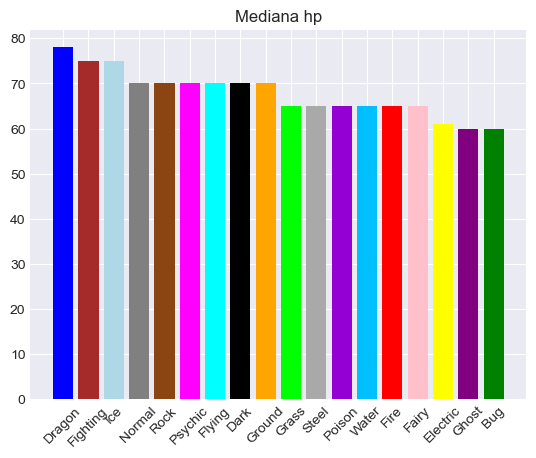

In [461]:
plt.bar(hp_bytype.index,hp_bytype,color=colores(hp_bytype.index))
plt.title('Mediana hp')
plt.xticks(rotation=45) 
plt.show()

En la gráfica se puede notar que los tipo dragon son los que tienen más HP debido a que son grandes y resistentes, por otro lado los tipo bug son los que tienen menos debido a que son más pequeños y menos resistentes.

In [462]:
attack_bytype = one_type_table.groupby('type')['attack'].median().sort_values(ascending=False)

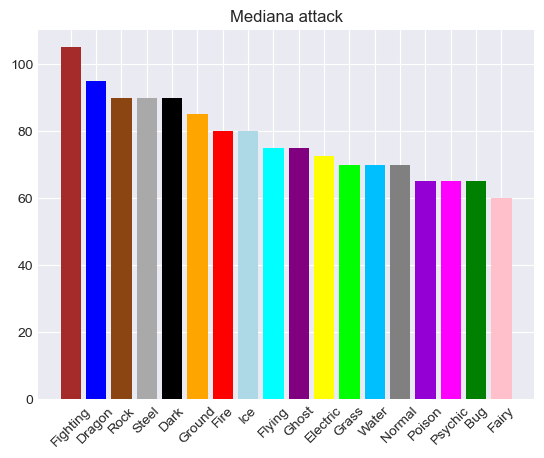

In [463]:
plt.bar(attack_bytype.index,attack_bytype,color=colores(attack_bytype.index))
plt.title('Mediana attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede notar que el tipo con mayor attack es el tipo fighting, esto podria ser debido a que el tipo de basa mayormente en los deporte de contacto.
Los tipos con menos attack son el tipo psychic y fairy, esto podria deberse a que la idea de estos tipos son los poderes especiales, para los fairy poderes magicos y para los psychic poderes psiquicos.

In [464]:
defense_bytype = one_type_table.groupby('type')['defense'].median().sort_values(ascending=False)

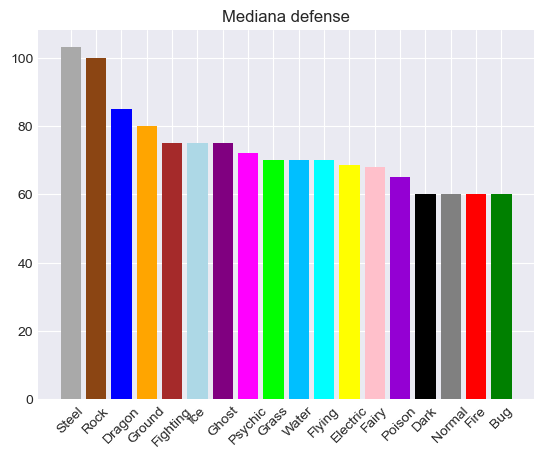

In [465]:
plt.bar(defense_bytype.index,defense_bytype,color=colores(defense_bytype.index))
plt.title('Mediana defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede evidenciar que los tipos steel and rock son los que tienen mas defense ya que el concepto de estos tipos son de materiales duros y resistentes.

In [466]:
sp_attack_bytype = one_type_table.groupby('type')['sp_attack'].median().sort_values(ascending=False)

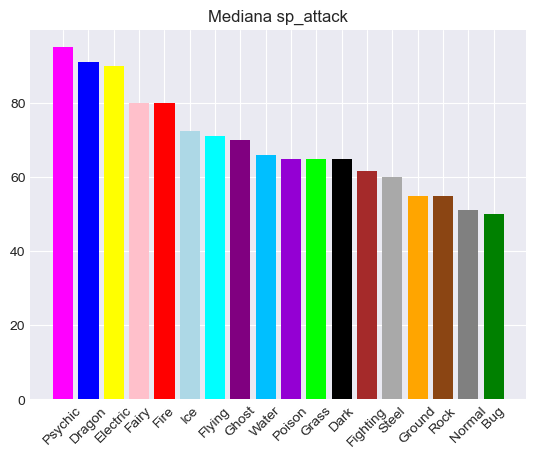

In [467]:
plt.bar(sp_attack_bytype.index,sp_attack_bytype,color=colores(sp_attack_bytype.index))
plt.title('Mediana sp_attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_attack debido a que la mayoria de ellos atacan con la mente.

In [468]:
sp_defense_bytype = one_type_table.groupby('type')['sp_defense'].median().sort_values(ascending=False)

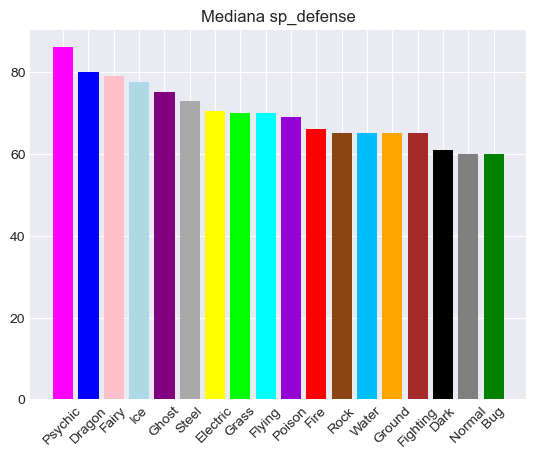

In [469]:
plt.bar(sp_defense_bytype.index,sp_defense_bytype,color=colores(sp_defense_bytype.index))
plt.title('Mediana sp_defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_defense debido a que su gran poder mental los puede proteger de ataque no tangentes.

In [470]:
speed_bytype = one_type_table.groupby('type')['speed'].median().sort_values(ascending=False)

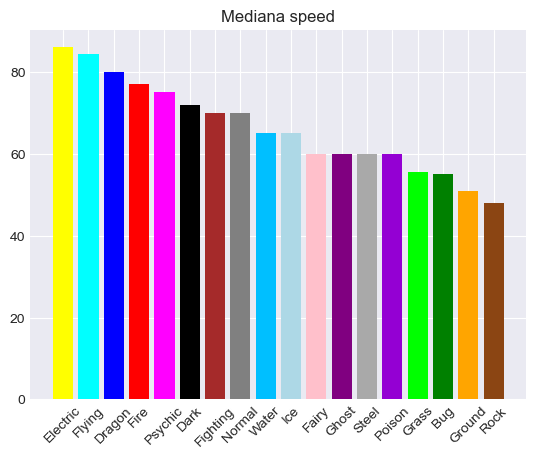

In [471]:
plt.bar(speed_bytype.index,speed_bytype,color=colores(speed_bytype.index))
plt.title('Mediana speed')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo electric son los que tienen mas speed debido a que la mayoria tiene la velocidad del rayo lo cual los hace rapidos.

## Construcción del modelo

### Stats mega evolución

La megaevolución hace que ciertos Pokémon adquieran una forma más poderosa, aunque solo pueden hacerlo durante los combate. Esto se hace mediando mega piedras. 


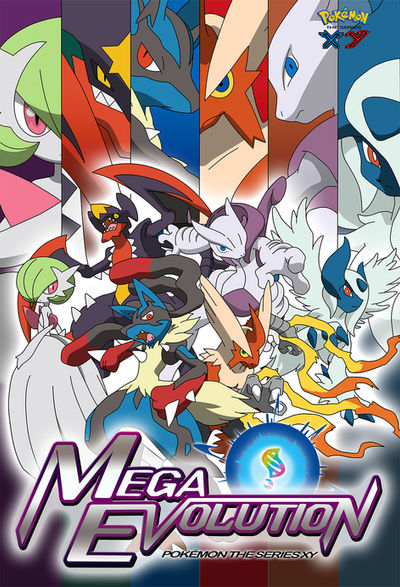

In [472]:
megas = df_pokemon[df_pokemon['name'].str[:len('Mega ')].str.contains('Mega ')]

In [473]:
pokemon_con_mega = df_pokemon.loc[df_pokemon['name'] == 'Venusaur']

In [474]:
for i in megas["number"].values[1:]:
    pokemon_con_mega = pd.concat([pokemon_con_mega, df_filtrado.loc[df_pokemon['number'] == i]], ignore_index=True)

In [475]:
pokemon_con_mega = pokemon_con_mega[~(pokemon_con_mega['name'] == "Galarian Slowbro")]

In [476]:
datos_x = pokemon_con_mega.drop(["number","name","type1","type2","generation","legendary"],axis=1)
datos_y = megas.drop(["number","name","type1","type2","generation","legendary"],axis=1)

In [477]:
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(datos_x, datos_y, test_size=.2)

In [478]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

modelo.fit(x_ent, y_ent)

predicciones = modelo.predict(x_pru)

In [479]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse = mean_squared_error(y_pru, predicciones)
print(f"Error cuadrático medio: {mse}")

r2 = r2_score(y_pru, predicciones)

print(f"r2: {r2}")

Error cuadrático medio: 255.62350287232874
r2: 0.6449498021558847


In [480]:
df_pre = pd.DataFrame(predicciones)

In [481]:
pd.concat([x_pru.reset_index(drop=True),y_pru.reset_index(drop=True)],axis=1)

total   hp  attack  defense  sp_attack  sp_defense  speed  total   hp  \
0    500   65     125      100         55          70     85    600   65   
1    600  100     134      110         95         100     61    700  100   
2    600   95     135       80        110          80    100    700   95   
3    534   78      84       78        109          85    100    634   78   
4    500   70     130      100         55          80     65    600   70   
5    475   70      75       60        105          60    105    575   70   
6    395   65      90       40         45          80     75    495   65   
7    600  108     130       95         80          85    102    700  108   
8    515   80     105       65         60          75    130    615   80   
9    534   78      84       78        109          85    100    634   78   

   attack  defense  sp_attack  sp_defense  speed  
0     155      120         65          90    105  
1     164      150         95         120     71  
2     145      130        120          90    120  
3     104       78        159         115    100  
4     150      140         65         100     75  
5      75       80        135          80    135  
6     150       40         15          80    145  
7     170      115        120          95     92  
8     135       85         70          95    150  
9     130      111        130          85    100

In [482]:
pd.concat([df_pre,y_pru.reset_index(drop=True)],axis=1)

0      1           2           3           4           5  \
0  600.330865   65.0  168.311881  117.874580   59.674792   81.849583   
1  701.184839  100.0  175.736770  129.996055  114.126404  112.697338   
2  700.427222   95.0  175.189446   94.209123  127.045325   94.554386   
3  633.149797   78.0  110.272363   94.600191  139.139880   98.932505   
4  600.760605   70.0  172.208680  121.257250   63.000768   91.610920   
5  573.732576   70.0   92.223551   82.540258  133.369908   81.377865   
6  494.795110   65.0  114.375757   69.730502   65.824258   96.711678   
7  700.945383  108.0  175.833380  113.521730   89.863409  102.104527   
8  614.693109   80.0  146.729420   79.591278   69.206216   88.617150   
9  633.149797   78.0  110.272363   94.600191  139.139880   98.932505   

            6  total   hp  attack  defense  sp_attack  sp_defense  speed  
0  107.620029    600   65     155      120         65          90    105  
1   68.628273    700  100     164      150         95         120     71  
2  114.428942    700   95     145      130        120          90    120  
3  112.204857    634   78     104       78        159         115    100  
4   82.682987    600   70     150      140         65         100     75  
5  114.220995    575   70      75       80        135          80    135  
6   83.152915    495   65     150       40         15          80    145  
7  111.622338    700  108     170      115        120          95     92  
8  150.549045    615   80     135       85         70          95    150  
9  112.204857    634   78     130      111        130          85    100

In [483]:
pd.concat([df_pre,x_pru.reset_index(drop=True)],axis=1)

0      1           2           3           4           5  \
0  600.330865   65.0  168.311881  117.874580   59.674792   81.849583   
1  701.184839  100.0  175.736770  129.996055  114.126404  112.697338   
2  700.427222   95.0  175.189446   94.209123  127.045325   94.554386   
3  633.149797   78.0  110.272363   94.600191  139.139880   98.932505   
4  600.760605   70.0  172.208680  121.257250   63.000768   91.610920   
5  573.732576   70.0   92.223551   82.540258  133.369908   81.377865   
6  494.795110   65.0  114.375757   69.730502   65.824258   96.711678   
7  700.945383  108.0  175.833380  113.521730   89.863409  102.104527   
8  614.693109   80.0  146.729420   79.591278   69.206216   88.617150   
9  633.149797   78.0  110.272363   94.600191  139.139880   98.932505   

            6  total   hp  attack  defense  sp_attack  sp_defense  speed  
0  107.620029    500   65     125      100         55          70     85  
1   68.628273    600  100     134      110         95         100     61  
2  114.428942    600   95     135       80        110          80    100  
3  112.204857    534   78      84       78        109          85    100  
4   82.682987    500   70     130      100         55          80     65  
5  114.220995    475   70      75       60        105          60    105  
6   83.152915    395   65      90       40         45          80     75  
7  111.622338    600  108     130       95         80          85    102  
8  150.549045    515   80     105       65         60          75    130  
9  112.204857    534   78      84       78        109          85    100

In [484]:
pd.concat([df_pre.iloc[:, 1:].sum(axis=1),df_pre.iloc[:,0].reset_index(drop=True)],axis=1)

0           0
0  600.330865  600.330865
1  701.184839  701.184839
2  700.427222  700.427222
3  633.149797  633.149797
4  600.760605  600.760605
5  573.732576  573.732576
6  494.795110  494.795110
7  700.945383  700.945383
8  614.693109  614.693109
9  633.149797  633.149797

### Tipos pokemon

In [485]:
tipos = one_type_table["type"]


In [486]:
stats_pokemon = one_type_table.drop(["number","type","name","generation","legendary"],axis=1)

In [487]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

onehot = encoder.fit_transform(tipos.to_frame())

onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out())

In [488]:
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(stats_pokemon, onehot_df, test_size=.2)

In [489]:
from sklearn.tree import DecisionTreeClassifier
modelo_tipos=DecisionTreeClassifier(max_depth=30)
modelo_tipos.fit(x_ent, y_ent)
predicciones = modelo_tipos.predict(x_pru)

In [490]:
accuracy_score(y_pru, predicciones)

0.043333333333333335

In [491]:
r2 = r2_score(y_pru, predicciones)

print(f"r2: {r2}")

r2: -0.8256283200578592


### Legendarios